In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

data = pd.read_csv('/home/degottardiraphael/MasterThesis/Benchmarking pipeline/Scores/MECR/MECR.csv')
data = data.drop(columns=['Gene Pair'])

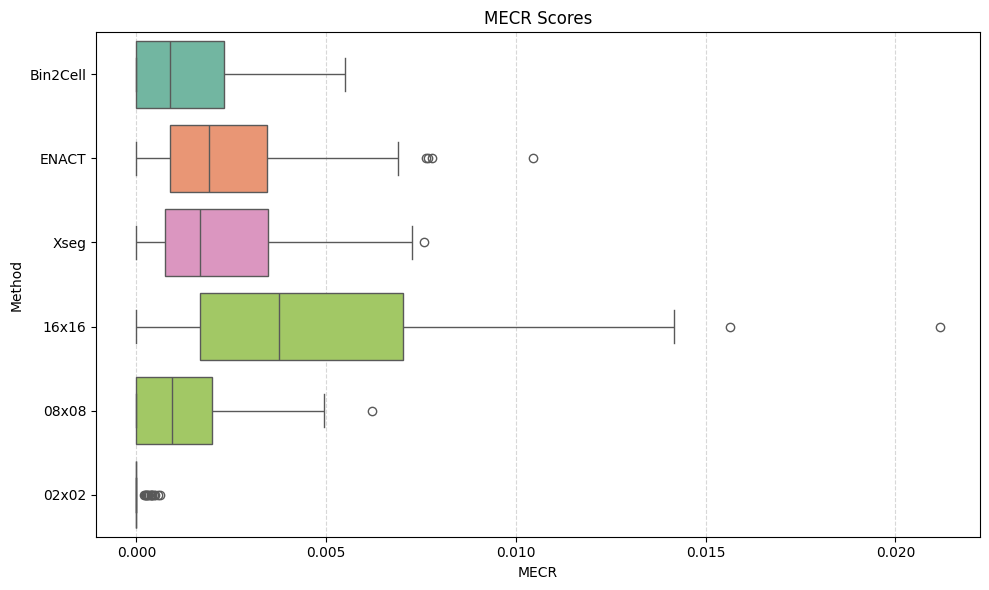

In [3]:
# Define a color palette and assign the same color to '16x16', '08x08', and '02x02'
palette = sns.color_palette("Set2", n_colors=5)
method_colors = {
    'Bin2Cell': palette[0],
    'ENACT': palette[1],
    'Xseg': palette[3],
    '16x16': palette[4],
    '08x08': palette[4],
    '02x02': palette[4],
    '8x8': palette[4],
    '2x2': palette[4],
}

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, palette=method_colors, orient="h")
plt.title("MECR Scores")
plt.xlabel("MECR")
plt.ylabel("Method")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [4]:
# Load the summary data
mecr_summary = pd.read_csv('/home/degottardiraphael/MasterThesis/Benchmarking pipeline/Scores/MECR/MECR_summary.csv')

# Group by method and sort by mean_coexpression for line plotting
mecr_summary_sorted = mecr_summary.sort_values(['method', 'mean_coexpression'])


In [5]:
method_colors

{'Bin2Cell': (0.4, 0.7607843137254902, 0.6470588235294118),
 'ENACT': (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 'Xseg': (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 '16x16': (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 '08x08': (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 '02x02': (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 '8x8': (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 '2x2': (0.6509803921568628, 0.8470588235294118, 0.32941176470588235)}

In [6]:
import colorsys
import random

# Prepare color mapping for the methods in mecr_summary_sorted
def similar_color(color, delta):
    # Slightly perturb each RGB channel within [0, 1]
    return tuple(
        min(1.0, max(0.0, c + random.uniform(-delta, delta)))
        for c in color
    )

# Helper to get base color and color variant for each method
def get_method_color(method, method_seen, delta=0.3):
    if method == 'Bin2Cell':
        key = 'Bin2Cell'
        color = method_colors[key]
        return color
    elif method == 'ENACT by Area':
        key = 'ENACT'
        color = method_colors[key]
        return color
    elif method.startswith('ENACT'):
        key = 'ENACT'
        color = method_seen.get(method, 1)
        if color == 1:
            base_color = method_colors[key]
            color = similar_color(base_color, delta)
            method_seen[method] = color
        return color
    elif method == 'Xseg':
        key = 'Xseg'
        color = method_colors[key]
        return color
    elif method.startswith('Xseg'):
        key = 'Xseg'        
        color = method_seen.get(method, 1)
        if color == 1:
            base_color = method_colors[key]
            color = similar_color(base_color, delta)
            method_seen[method] = color
        return color
    elif method == 'Bins':
        key = '16x16'
        color = method_colors[key]
        return color
    else:
        return None

random.seed(10)  # For reproducibility
method_seen = {}
mecr_summary_sorted['color'] = [
    get_method_color(method, method_seen) for method in mecr_summary_sorted['method']
]


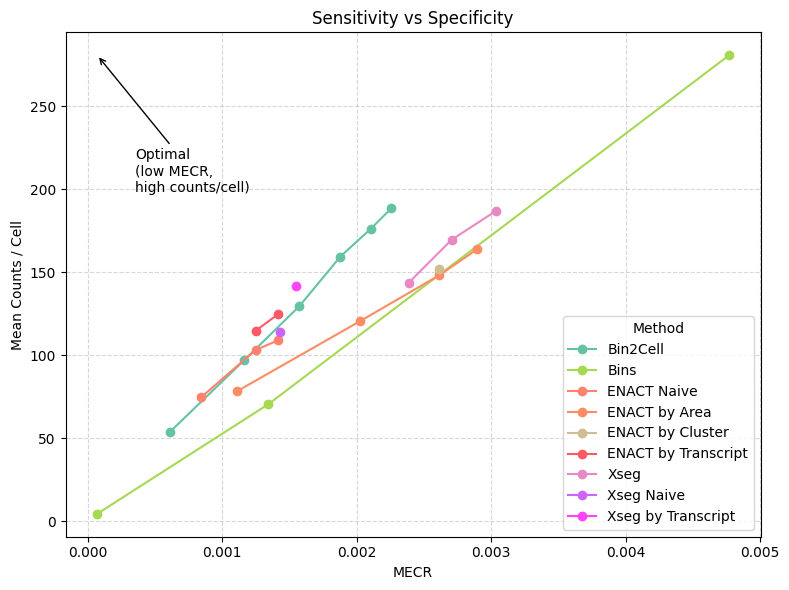

In [7]:
plt.figure(figsize=(8, 6))
for method, group in mecr_summary_sorted.groupby('method'):
    color = group['color'].iloc[0]  # Get the color for this method from the DataFrame
    plt.plot(group['mean_coexpression'], group['mean_counts_per_cell'], marker='o', label=method, color=color)

# Add an annotation to indicate the optimal area (top left)
plt.annotate(
    'Optimal\n(low MECR,\nhigh counts/cell)',
    xy=(mecr_summary_sorted['mean_coexpression'].min(), mecr_summary_sorted['mean_counts_per_cell'].max()),
    xytext=(mecr_summary_sorted['mean_coexpression'].min()*5, mecr_summary_sorted['mean_counts_per_cell'].max()*0.8),
    arrowprops=dict(facecolor='black', arrowstyle='->'),
    fontsize=10,
    ha='left',
    va='top'
)

plt.xlabel('MECR')
plt.ylabel('Mean Counts / Cell')
plt.title('Sensitivity vs Specificity')
plt.legend(title='Method', loc='lower right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


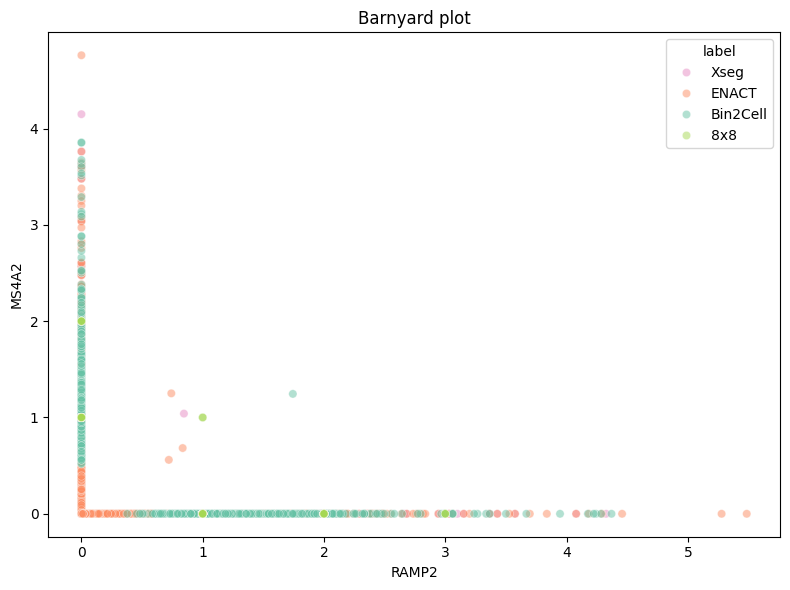

In [8]:
# Load the data
ramp2_ms4a2 = pd.read_csv('/home/degottardiraphael/MasterThesis/Benchmarking pipeline/Scores/MECR/RAMP2_MS4A2_counts_Xseg.csv')

# Assume the first two columns are gene names, last column is the label
gene1 = ramp2_ms4a2.columns[1]
gene2 = ramp2_ms4a2.columns[2]
label_col = ramp2_ms4a2.columns[-1]

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=ramp2_ms4a2,
    x=gene1,
    y=gene2,
    hue=label_col,
    palette=method_colors,
    alpha=0.5
)
plt.xlabel(gene1)
plt.ylabel(gene2)
plt.title('Barnyard plot')
plt.legend(title=label_col)
plt.tight_layout()
plt.show()

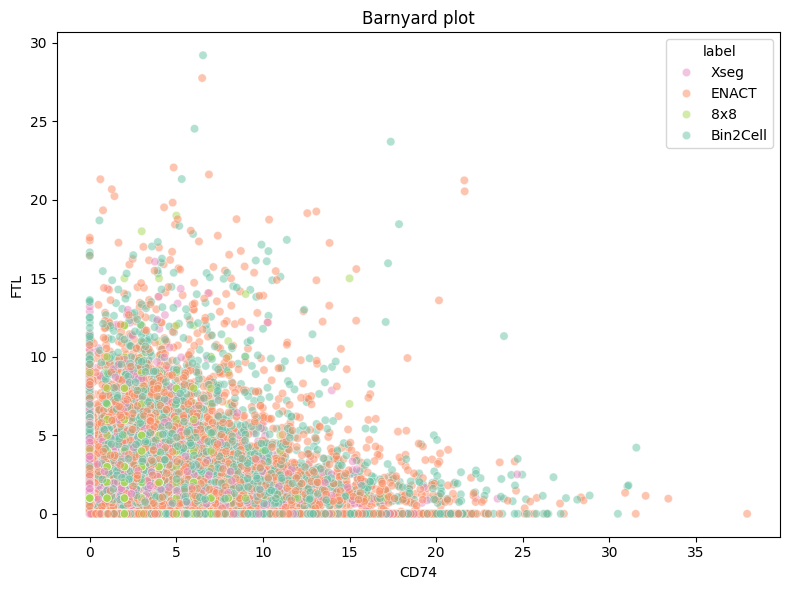

In [9]:
cd74_ftl = pd.read_csv('/home/degottardiraphael/MasterThesis/Benchmarking pipeline/Scores/MECR/CD74_FTL_counts_Xseg.csv')
# Assume the first two columns are gene names, last column is the label
gene1 = cd74_ftl.columns[0]
gene2 = cd74_ftl.columns[1]
label_col = cd74_ftl.columns[-1]
# note that the rows were shuffled to ensure that no important freatures are covered up
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=cd74_ftl,
    x=gene1,
    y=gene2,
    hue=label_col,
    palette=method_colors,
    alpha=0.5
)
plt.xlabel(gene1)
plt.ylabel(gene2)
plt.title('Barnyard plot')
plt.legend(title=label_col)
plt.tight_layout()
plt.show()